<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [2]:
##### Your Code Here #####
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
opt = SGD(lr=0.01, momentum=0.9)

model = Sequential()

model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(9, activation='relu'))
#model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=opt)

In [62]:
history = model.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_test_scaled, y_test), verbose=False)

In [63]:
history.history

{'loss': [255.8574468027247,
  70.04967502556225,
  57.79611838690125,
  41.8839628767259,
  35.25268781303179,
  34.81016718042959,
  27.984582579962098,
  30.101730403333608,
  31.1601397448247,
  28.19997285144164,
  22.560946558961774,
  21.25888990647722,
  23.079991236771686,
  22.631996022592677,
  23.16429831249879,
  22.538481372417788,
  19.381618990756497,
  19.094122782792194,
  22.0249923951555,
  17.4429509757769,
  20.644582276297086,
  20.129173071077556,
  20.37521520935663,
  17.596267421646875,
  20.143024954465357,
  20.50084939333472,
  16.963470652551933,
  20.485637400409964,
  19.54329269711334,
  20.423944076689164,
  21.14005147348536,
  20.754221056947614,
  15.29050891234143,
  15.2442416011697,
  16.020904238861387,
  19.17165990395121,
  19.196658483826287,
  14.98430874324081,
  22.85179019210362,
  18.65077568280815,
  22.129250139293106,
  20.581223006295687,
  16.82597773145921,
  18.305091215832398,
  17.613291126666685,
  20.475119770163356,
  18.681

In [67]:
scores = model.evaluate(X_test_scaled, y_test, verbose=False)

In [68]:
scores

15.750635109695734

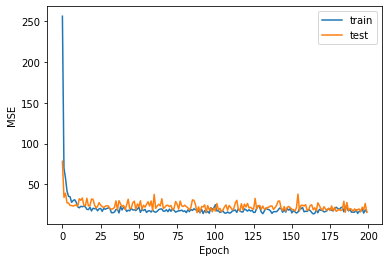

In [66]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE');

### Trying some PCA

In [11]:
pca = PCA(n_components=2)

X_train_analyzed = pca.fit_transform(X_train_scaled)
X_test_analyzed = pca.transform(X_test_scaled)

In [16]:
opt = SGD(lr=0.01, momentum=0.9)

model = Sequential(name='PCAregression')

model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=opt)

In [17]:
history = model.fit(X_train_analyzed, y_train, epochs=200, validation_data=(X_test_analyzed, y_test), verbose=False)

In [18]:
scores = model.evaluate(X_test_analyzed, y_test, verbose=False)

In [19]:
history.history

{'loss': [364.93662103331917,
  94.87409247974358,
  89.15963790440324,
  85.14768196332572,
  84.93608448292949,
  84.70195339693882,
  84.73252037728187,
  84.64975829171662,
  84.89106206610651,
  85.00249460428068,
  84.65120432636526,
  84.66529687560431,
  84.77213113614829,
  84.63924083143178,
  84.87533750628481,
  85.34900060974725,
  84.63353842555887,
  84.78637007911607,
  84.90260322495263,
  84.77515721085048,
  84.87129438041461,
  84.62219812374303,
  85.0336280293984,
  85.13862043324083,
  84.68901515243077,
  84.80308593145692,
  84.98926109842735,
  85.11092331385848,
  84.66093784747737,
  84.7934756137357,
  84.74135884199993,
  84.96766050735323,
  84.9571411208351,
  84.68835615403582,
  84.75541415072904,
  84.69499520027992,
  84.90484437848082,
  84.75152270628674,
  84.81516243207572,
  84.83184376329478,
  84.86331040788404,
  84.82557058806466,
  84.67211188892327,
  85.00620435960222,
  84.64365976163657,
  84.93997071521117,
  84.80793890622583,
  84.69

### PCA did not help the Neural Network, in fact it did worse

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [70]:
linreg = LinearRegression()

linreg.fit(X_train_scaled, y_train)

y_pred = linreg.predict(X_test_scaled)
#linreg.score(y_test.reshape(-1,1), y_pred.reshape(-1,1))
#print('Linear Regression Score:', linreg.score(y_pred, y_test.reshape(-1,1)))

In [23]:
mean_squared_error(y_test, y_pred)

56.24057049658254

In [24]:
linreg = LinearRegression()

linreg.fit(X_train_analyzed, y_train)

y_pred = linreg.predict(X_test_analyzed)

mean_squared_error(y_test, y_pred)

56.24057049658254

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [28]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [29]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_train.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

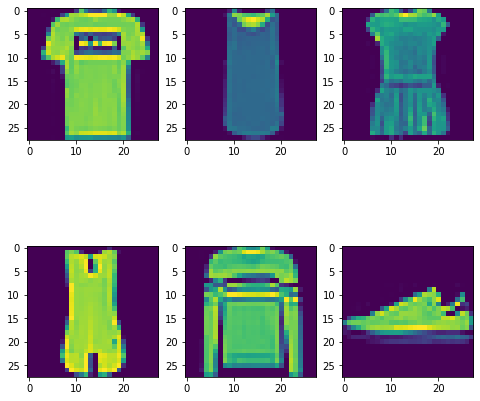

In [97]:
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
plt.show();

In [30]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

In [31]:
X_train = X_train / 255
X_test = X_test / 255

In [32]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [88]:
mnist_model = Sequential(name='EightySixPercentBaby')

mnist_model.add(Dense(32, input_dim=784, activation='relu'))
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dropout(0.2))
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy', optimiser='adam', metrics=['accuracy'])

mnist_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [78]:
history = mnist_model.fit(X_train, y_train,
                          epochs=25,
                          batch_size=64,
                          validation_data=(X_test, y_test),
                          verbose=False)

In [79]:
mnist_model.evaluate(X_test, y_test, verbose=False)

[0.42291228910684586, 0.8685]

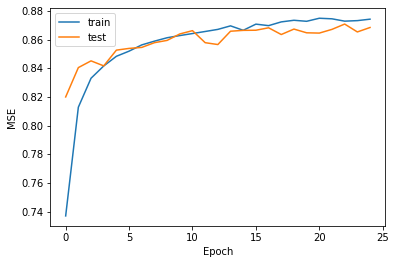

In [80]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy');

In [41]:
mnist_model = Sequential(name='TryAnother')

mnist_model.add(Dense(256, input_dim=784, activation='relu'))
mnist_model.add(Dense(128, activation='selu'))
mnist_model.add(Dense(64, activation='selu'))
mnist_model.add(Dense(32, activation='selu'))
mnist_model.add(Dense(16, activation='selu'))
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy', optimiser='adam', metrics=['accuracy'])

mnist_model.summary()

Model: "TryAnother"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                170       
Total params: 244,890
Trainable params: 244,890
Non-trainable params: 0
__________________________________________________

In [42]:
history = mnist_model.fit(X_train, y_train,
                          epochs=25,
                          batch_size=88,
                          validation_data=(X_test, y_test),
                          verbose=False)

In [43]:
mnist_model.evaluate(X_test, y_test, verbose=False)

[0.38530473683476446, 0.894]

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.